In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Loading the dataset
df = pd.read_csv('./Mall_Customers.csv')

# Displaying the first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


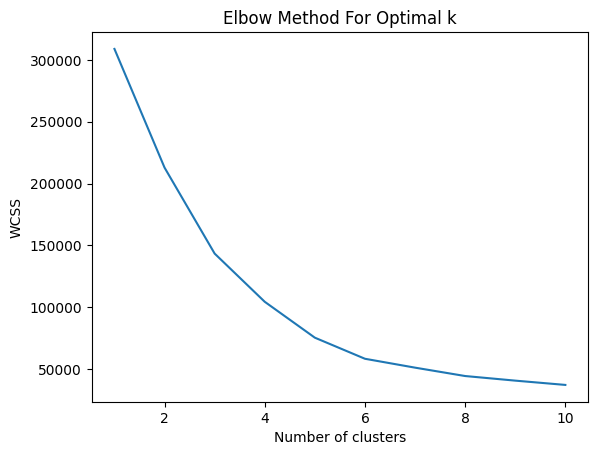

In [4]:
# Chsoosing features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Trying different values of k to find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Drawing the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
#  Applying K-Means with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding the 'Cluster' column to the dataframe
df['Cluster'] = y_kmeans
# y_kmeans

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


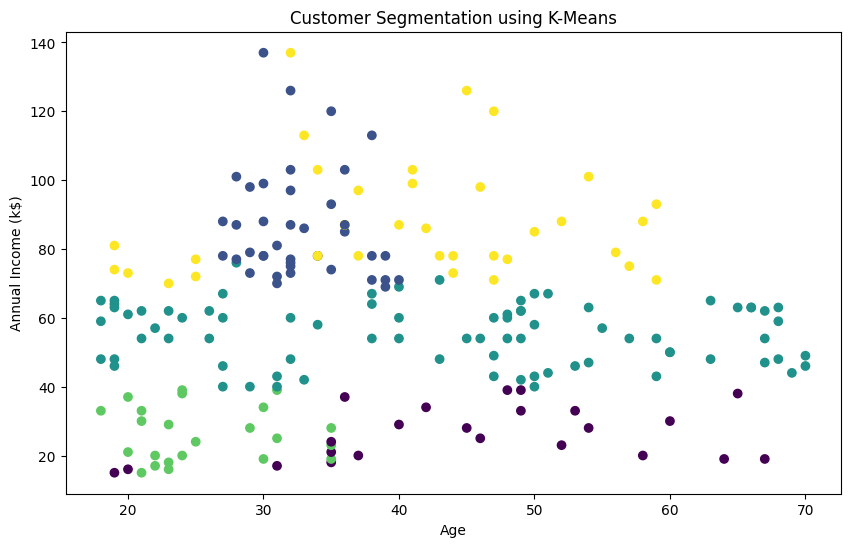

In [6]:
# Displaying the first 5 rows with the new 'Cluster' column
display(df.head())

# Plotting the data with clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


In [7]:
# Numeric columns in the dataframe
numeric_cols = df.select_dtypes(include='number').columns

# Calculating the mean for each cluster while ignoring non-numeric or NaN values
cluster_description = df.groupby('Cluster')[numeric_cols].mean(numeric_only=True)
display(cluster_description)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
Cluster,,,,,
0,23.000000,45.217391,26.304348,20.913043,0.0
1,162.000000,32.692308,86.538462,82.128205,1.0
2,86.265823,43.088608,55.291139,49.569620,2.0
3,24.000000,25.521739,26.304348,78.565217,3.0
4,163.500000,40.666667,87.750000,17.583333,4.0


In [8]:
# Categorical columns in the dataframe
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    display(f"Column: {col}")
    # Calculating the mode for each cluster
    display(df.groupby('Cluster')[col].agg(lambda x: x.mode()[0]))


'Column: Gender'

Cluster
0    Female
1    Female
2    Female
3    Female
4      Male
Name: Gender, dtype: object